In [2]:
library(data.table)
library(dplyr)
library(ggplot2)

Warning message:
"package 'data.table' was built under R version 3.3.3"Warning message:
"package 'dplyr' was built under R version 3.3.2"------------------------------------------------------------------------------
data.table + dplyr code now lives in dtplyr.
Please library(dtplyr)!
------------------------------------------------------------------------------

Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
#Download the data
download.file(url='http://dvn-vm1.hmdc.harvard.edu/data/mysql/irclog/irclog.tsv', destfile='data/irclog.tsv')

In [4]:
df <- fread("data/irclog.tsv")

In [5]:
head(df,3)

id,channel,day,nick,timestamp,line,spam,in_summary
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
1,#dvn,2012-12-08,,1355005146,iqlogbot joined #dvn,0,0
2,#dvn,2012-12-08,,1355005248,Topic for #dvn is now http://thedata.org - The Dataverse Network Project | logs at http://irclog.iq.harvard.edu/dvn/today,0,0
3,#dvn,2012-12-08,pdurbin,1355005351,"hello! welcome to #dvn, an IRC channel on Freenode about The Dataverse Network Project, a web application for sharing, citing, analyzing, and preserving research data",0,0


In [6]:
#Make a new table which lists each nickname and the number of messages issued by that nickname
chat.freq <- as.data.frame(table(df$nick))

In [7]:
#Sort nicknames based on frequency
chat.freq.sorted <- chat.freq[order(-chat.freq$Freq),]

In [8]:
#Notice the numerous entries associated with no nickname (Row 1).
head(chat.freq.sorted)

,Var1,Freq
,<fct>,<int>
1,,32987
348,pdurbin,26847
338,pameyer,4859
365,poikilotherm,4454
146,donsizemore,3652
68,bencomp,2753


In [11]:
# Remove any entries with blank nickname
chat.freq.sorted <- chat.freq.sorted[chat.freq.sorted$Var1!="",]

In [18]:
#Filter out the top 25
superusers <- chat.freq.sorted[1:25,]

In [19]:
#Order the nickname levels based on frequency; this is the order the plot will show
superusers$Var1 <- factor(superusers$Var1, levels = superusers$Var1[order(superusers$Freq)])

In [20]:
#Fetch and format min and max dates of the data
date.min <- min(df$day) %>% as.Date() %>% format(format="%b %d, %Y")

In [21]:
date.max <- max(df$day) %>% as.Date() %>% format(format="%b %d, %Y")

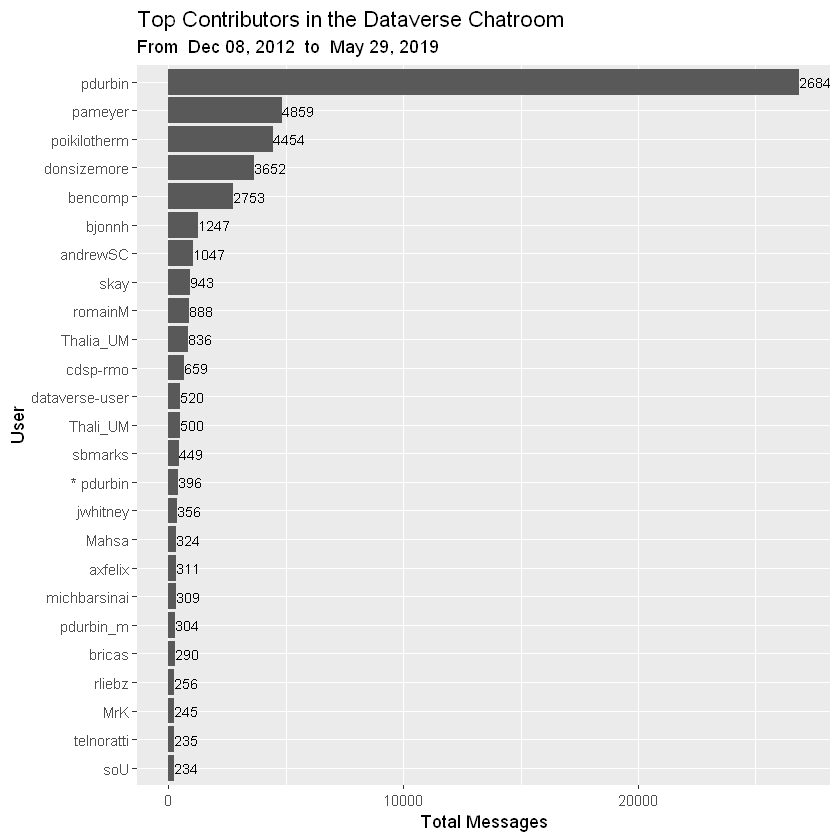

In [25]:
#Plot
ggplot(superusers, aes(x=Var1, y=Freq, label=Freq)) +
    geom_col() +
    coord_flip() +
    geom_text(size=3, hjust="bottom") +
    labs(title="Top Contributors in the Dataverse Chatroom", subtitle=paste("From ", date.min, " to ", date.max), x="User", y="Total Messages")

In [23]:
ggsave("ircsuperusers.png", width = 6, height = 7)

In [24]:
superusers

,Var1,Freq
,<fct>,<int>
348,pdurbin,26847
338,pameyer,4859
365,poikilotherm,4454
146,donsizemore,3652
68,bencomp,2753
77,bjonnh,1247
51,andrewSC,1047
425,skay,943
384,romainM,888
